# Tugas Pembelajaran Mesin : Preprocessing Data  
__Link Dataset__: https://www.kaggle.com/datasets/nikhil7280/weather-type-classification
- Nama    : Farhan Nawwafal Pramudia
- NIM     : 10123470
- Kelas   : IF-4

## Menyiapkan Library yang Dibutuhkan

In [1]:
import pandas as pd
import seaborn  as sns
from sklearn.preprocessing import RobustScaler

## Gathering Data

**Membaca file `weathers_classification_data.csv`**

In [2]:
df = pd.read_csv('./dataset/weather_classification_data.csv')

**Menampilkan data nya**

In [3]:
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


## Exploratory Data Analysis

### Melihat Struktur Data dari `dataframe (df)`

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


Insight: struktur data dari dataframe, semuanya sudah benar. Tidak ada tipe data yang kurang tepat.

### Cek Descriptive Statistics

In [5]:
df.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


### Cek Missing Values

In [6]:
df.isna().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

Insight: Dari data di atas, terlihat jelas bahwa pada data `weather_classification_data`, tidak ada kolom yang memiliki data yang kosong atau missing value

### Cek Duplikasi Data

In [7]:
print(f'Jumlah data duplikat: {df.duplicated().sum()} buah data')

Jumlah data duplikat: 0 buah data


Insight: Dari data di atas, terlihat jelas bahwa tidak ada data yang duplikat.

In [8]:
df['Temperature'].max()

109.0

### Cek Outlier

**Cek outlier kolom `Temperature`**

<Axes: xlabel='Temperature'>

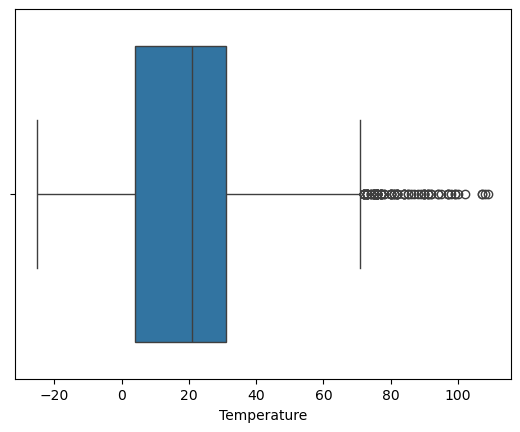

In [9]:
sns.boxplot(data=df, x=df['Temperature'])

In [10]:
df['Temperature'].skew()

0.2217414467117672

**Cek outlier kolom `Humidity`**

<Axes: xlabel='Humidity'>

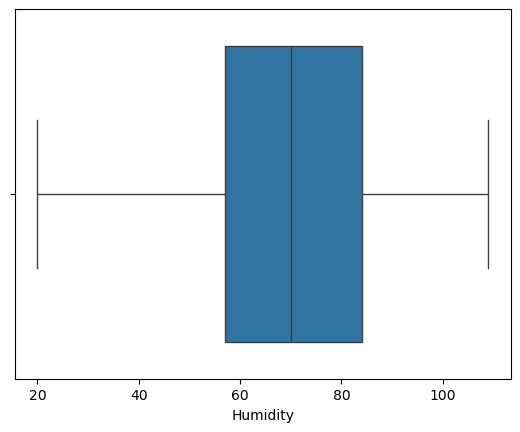

In [11]:
sns.boxplot(data=df, x=df['Humidity'])

In [12]:
df['Humidity'].skew()

-0.40161426558981855

**Cek outlier kolom `Wind Speed`**

<Axes: xlabel='Wind Speed'>

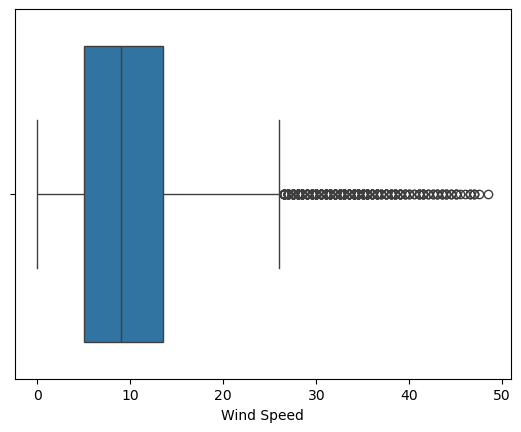

In [13]:
sns.boxplot(data=df, x=df['Wind Speed'])

In [14]:
df['Wind Speed'].skew()

1.3602625756285232

**Cek outlier kolom `precipitation`**

<Axes: xlabel='Precipitation (%)'>

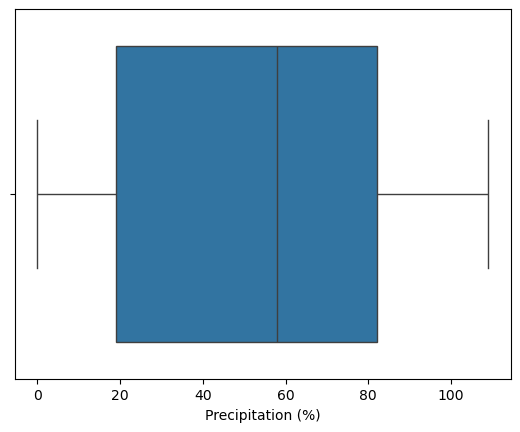

In [15]:
sns.boxplot(data=df, x=df['Precipitation (%)'])

In [16]:
df['Precipitation (%)'].skew()

-0.15245706717664612

**Cek outlier `Atmoshperic Pressure`**

<Axes: xlabel='Atmospheric Pressure'>

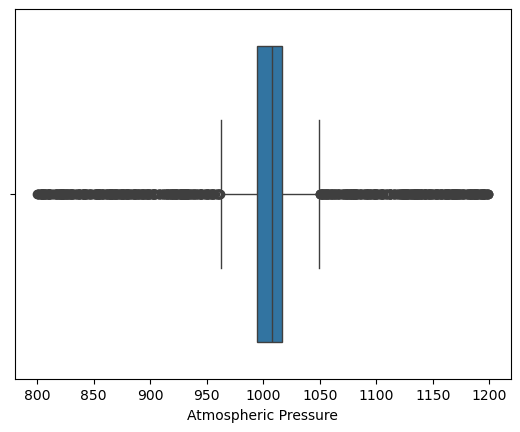

In [17]:
sns.boxplot(data=df, x=df['Atmospheric Pressure'])

In [18]:
df['Atmospheric Pressure'].skew()

-0.2938986063675234

**Cek outlier kolom `Visibility`**

<Axes: xlabel='Visibility (km)'>

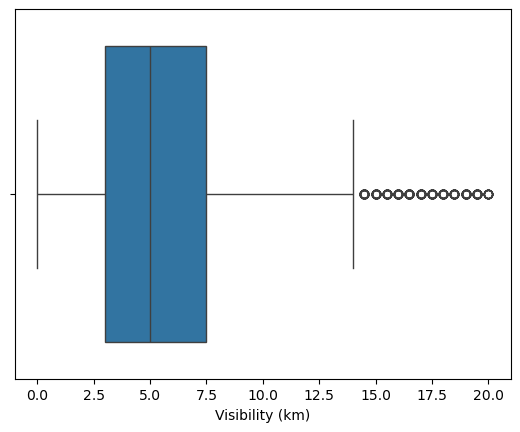

In [19]:
sns.boxplot(data=df, x=df['Visibility (km)'])

In [20]:
df['Visibility (km)'].skew()

1.2332751645049822

## Preprocessing Data

### Copy Data Asli

In [21]:
df_new = df.copy()
df_new

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


### Transformasi Data

In [22]:
scaler = RobustScaler()

In [23]:
cols_to_scale = df_new.select_dtypes(include=['number']).columns
cols_to_scale

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Atmospheric Pressure', 'UV Index', 'Visibility (km)'],
      dtype='object')

In [24]:
df_new[cols_to_scale] = scaler.fit_transform(df_new[cols_to_scale])
df_new

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,-0.259259,0.111111,0.058824,0.380952,partly cloudy,0.144271,-0.166667,Winter,-0.333333,inland,Rainy
1,0.666667,0.962963,-0.058824,0.206349,partly cloudy,0.172033,0.666667,Spring,1.111111,inland,Cloudy
2,0.333333,-0.222222,-0.235294,-0.666667,clear,0.503812,0.333333,Spring,0.111111,mountain,Sunny
3,0.629630,0.481481,-0.882353,0.380952,clear,0.846513,0.666667,Spring,-0.888889,coastal,Sunny
4,0.222222,0.148148,0.941176,0.126984,overcast,-0.772784,-0.333333,Winter,-0.555556,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,-0.407407,0.148148,0.647059,0.206349,overcast,-0.204801,-0.333333,Summer,-0.888889,mountain,Rainy
13196,-0.814815,0.222222,-0.647059,-0.555556,cloudy,2.711571,-0.333333,Winter,0.222222,coastal,Snowy
13197,0.333333,0.259259,-0.411765,-0.476190,overcast,0.229378,0.000000,Autumn,0.888889,coastal,Cloudy
13198,-0.666667,0.222222,0.117647,0.571429,overcast,-1.064057,-0.500000,Winter,-0.666667,inland,Snowy


In [25]:
df.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


Insight: Descriptive statistics dari data `weather_classification_data` sebelum dipreprocessing

In [26]:
df_new.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,-0.069349,-0.047747,0.097906,-0.069137,-0.082927,0.167626,0.102870
std,0.643938,0.747935,0.812789,0.507088,1.693007,0.642767,0.749222
min,-1.703704,-1.851852,-1.058824,-0.920635,-9.444988,-0.500000,-1.111111
25%,-0.629630,-0.481481,-0.470588,-0.619048,-0.584822,-0.333333,-0.444444
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.370370,0.518519,0.529412,0.380952,0.415178,0.666667,0.555556
max,3.259259,1.444444,4.647059,0.809524,8.718170,1.833333,3.333333


Insight: Descriptive statistics dari data `weather_classification_data` sesudah dipreprocessing

## Hasil Akhir

In [27]:
df_new.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,-0.259259,0.111111,0.058824,0.380952,partly cloudy,0.144271,-0.166667,Winter,-0.333333,inland,Rainy
1,0.666667,0.962963,-0.058824,0.206349,partly cloudy,0.172033,0.666667,Spring,1.111111,inland,Cloudy
2,0.333333,-0.222222,-0.235294,-0.666667,clear,0.503812,0.333333,Spring,0.111111,mountain,Sunny
3,0.629630,0.481481,-0.882353,0.380952,clear,0.846513,0.666667,Spring,-0.888889,coastal,Sunny
4,0.222222,0.148148,0.941176,0.126984,overcast,-0.772784,-0.333333,Winter,-0.555556,mountain,Rainy


In [28]:
df_new.tail()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
13195,-0.407407,0.148148,0.647059,0.206349,overcast,-0.204801,-0.333333,Summer,-0.888889,mountain,Rainy
13196,-0.814815,0.222222,-0.647059,-0.555556,cloudy,2.711571,-0.333333,Winter,0.222222,coastal,Snowy
13197,0.333333,0.259259,-0.411765,-0.476190,overcast,0.229378,0.000000,Autumn,0.888889,coastal,Cloudy
13198,-0.666667,0.222222,0.117647,0.571429,overcast,-1.064057,-0.500000,Winter,-0.666667,inland,Snowy
13199,-0.962963,-1.185185,-1.058824,0.539683,overcast,0.351348,0.333333,Autumn,1.111111,mountain,Rainy
